In [1]:
#library
import pandas as pd
#read the csv file
# dataset=pd.read_csv("C:/Users/sharm/Desktop/AS/insurance.csv")
# dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# ENCRYPTION
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

def BytesToInt(b):
    return int.from_bytes(b, byteorder='big')

# Load dataset
dataset = pd.read_csv("C:/Users/sharm/Desktop/AS/insurance.csv")

# Choose a column to encrypt (replace 'column_to_encrypt' with the actual column name)
column_to_encrypt = 'bmi'

# Generate a random 256-bit key
key = os.urandom(32)

# Create a cipher object using AES in CBC mode with a random IV
cipher = Cipher(algorithms.AES(key), modes.CFB(os.urandom(16)), backend=default_backend())

# Convert the column to bytes and pad it to be a multiple of 16 bytes (AES block size)
dataset[column_to_encrypt] = dataset[column_to_encrypt].astype(str).apply(lambda x: x.encode('utf-8').ljust(16 * ((len(x) // 16) + 1)))

# Encrypt each value in the column
dataset[column_to_encrypt] = dataset[column_to_encrypt].apply(lambda x: BytesToInt(cipher.encryptor().update(x)))

# Save the key for future decryption
with open('encryption_key.txt', 'wb') as key_file:
    key_file.write(key)

In [5]:
# dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,180633008714955342026345099420000408027,0,yes,southwest,16884.92400
1,18,male,179283010746572816926174731019633643995,1,no,southeast,1725.55230
2,28,male,179283010977139149243076807219595530715,3,no,southeast,4449.46200
3,33,male,180617431037063170741973414016091509211,0,no,northwest,21984.47061
4,32,male,180669354874669128412579911037647147483,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,179298588429430046551703698444060807643,3,no,northwest,10600.54830
1334,18,female,179293396131024086674968442604107682267,0,no,northeast,2205.98080
1335,18,female,179308973101756308701582406892813636059,0,no,southeast,1629.83350
1336,21,female,180643393387900574195866498006202798555,0,no,southwest,2007.94500


In [6]:
#region
# dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
# #smoker
# dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
#sex
# dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
#check null values
# dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
#detailed info
# dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   object 
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


In [11]:
#convert categorical to numerical
dataset['sex'] = dataset['sex'].map({'female': 0, 'male': 1})

In [12]:
dataset['smoker'] = dataset['smoker'].map({'no':0,'yes':1})

In [13]:
dataset['region'] = dataset['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})
# print(dataset)

      age  sex                                      bmi  children  smoker  \
0      19    0  180633008714955342026345099420000408027         0       1   
1      18    1  179283010746572816926174731019633643995         1       0   
2      28    1  179283010977139149243076807219595530715         3       0   
3      33    1  180617431037063170741973414016091509211         0       0   
4      32    1  180669354874669128412579911037647147483         0       0   
...   ...  ...                                      ...       ...     ...   
1333   50    1  179298588429430046551703698444060807643         3       0   
1334   18    0  179293396131024086674968442604107682267         0       0   
1335   18    0  179308973101756308701582406892813636059         0       0   
1336   21    0  180643393387900574195866498006202798555         0       0   
1337   61    0  180664161948627568618156855823838040539         0       1   

      region      charges  
0          1  16884.92400  
1          0   1725

In [14]:
#assigning x & y
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [15]:
#split the dataset into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.2)

In [16]:
# #Linear Regression
# from sklearn.linear_model import LinearRegression
# lr=LinearRegression()
# lr.fit(x_train,y_train)

LinearRegression()

In [17]:
# #Random Forest
# from sklearn.ensemble import RandomForestRegressor
# rf=RandomForestRegressor()
# rf.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
# #Decision Tree
# from sklearn.tree import DecisionTreeRegressor
# dt=DecisionTreeRegressor()
# dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [20]:
# #Lasso
# from sklearn.linear_model import Lasso
# lasso = Lasso()
# lasso.fit(x_train, y_train)

c:\Users\sharm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+10, tolerance: 1.582e+07
  model = cd_fast.enet_coordinate_descent(


Lasso()

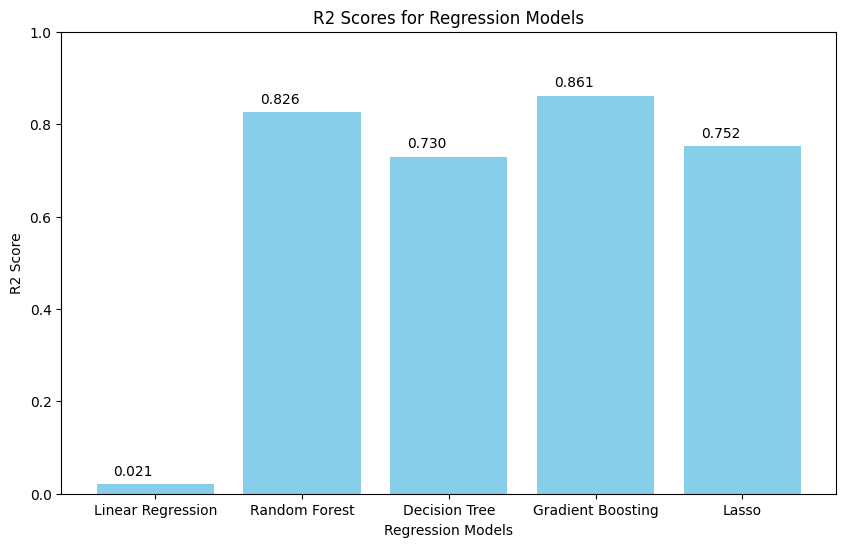

In [21]:
# from sklearn.metrics import r2_score
# import matplotlib.pyplot as plt
# import numpy as np

# models = [lr, rf, dt, gb, lasso]
# model_names = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'Lasso']
# r2_scores = []

# for model in models:
#     y_pred = model.predict(x_test)
#     r2 = r2_score(y_test, y_pred)
#     r2_scores.append(r2)

# # Create a bar graph
# plt.figure(figsize=(10, 6))
# bars = plt.bar(model_names, r2_scores, color='skyblue')
# plt.title('R2 Scores for Regression Models')
# plt.xlabel('Regression Models')
# plt.ylabel('R2 Score')
# plt.ylim(0, 1)  # R2 score ranges from 0 to 1

# # Add text annotations on top of each bar
# for bar, r2_score in zip(bars, r2_scores):
#     plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.02, f'{r2_score:.3f}', ha='center', color='black')

# plt.show()


In [93]:
from joblib import dump
dump(gb, './../savedModels/model.joblib')

['./../savedModels/model.joblib']